# Plotting 3D model data

In [6]:
import matplotlib.pyplot as plt
import flopy as fp
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

%matplotlib notebook

<IPython.core.display.Javascript object>


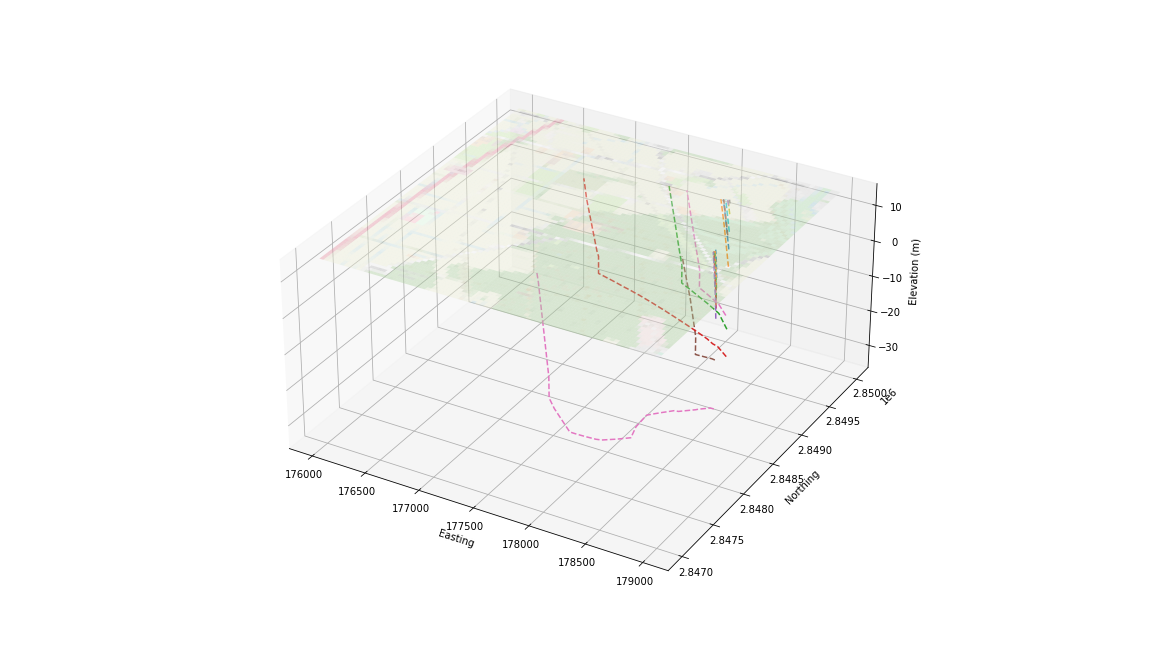

In [14]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

xll, yll = 171310, 2840534
top = 15
fname = "flowpaths.mppth"
p = fp.utils.PathlineFile(fname)
for i in range(p.get_maxid()+1):
    pi = p.get_data(partid=i)
    ax.plot(xll + pi['x'], yll + pi['y'], pi['z'], ls='--')

img = plt.imread("osm_flowpaths.png")
y = np.linspace(2850000, 2847000, img.shape[0])
x = np.linspace(176000, 179000, img.shape[1])
z =  np.full((len(y), len(x)), top)
x, y = np.meshgrid(x, y)
ax.plot_surface(x, y, z, rstride=2, cstride=2, 
                facecolors=img, edgecolor='none', 
                linewidth=0,
                alpha=0.4, shade=False)

ax.set_xlabel("Easting")
ax.set_ylabel("Northing")
ax.set_zlabel("Elevation (m)")

ax.set_box_aspect(aspect = (1,1,0.5))

plt.tight_layout()